#### Loading & Pre-Processing Song & Artist Data

In [1]:
# importing all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from pathlib import Path

In [2]:
# importing the file that contains all artist data
artists_file = Path(r'G:\Thesis\Data\8mil\artists.csv')
artists = pd.read_csv(artists_file)

# this is the amount of artists in the table
len(artists)

1066031

In [6]:
# dictionary that contains all the artist IDs
artist_id = artists.set_index('name')['id'].to_dict()

# example of getting an artist ID
artist_id['Amon Amarth']

'3pulcT2wt7FEG10lQlqDJL'

In [7]:
# dictionary that contains the follower count of each artist
artist_followers = artists.set_index('name')['followers'].to_dict()

# example of getting an artist following
artist_followers['Amon Amarth']

779453

In [169]:
# importing the file that contains all song data
songs_file = Path(r'G:\Thesis\Data\8mil\dataset.csv')
songs = pd.read_csv(songs_file)
songs.head(10)

,artist,song,popularity,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Xzibit,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",58,0.1800,0.893,219160,0.514,0.0000,11,0.0596,-5.080,1,0.283,95.848000,4,0.787
1,Erick Sermon,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",58,0.1800,0.893,219160,0.514,0.0000,11,0.0596,-5.080,1,0.283,95.848000,4,0.787
2,J. Ro,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",58,0.1800,0.893,219160,0.514,0.0000,11,0.0596,-5.080,1,0.283,95.848000,4,0.787
3,Tash,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",58,0.1800,0.893,219160,0.514,0.0000,11,0.0596,-5.080,1,0.283,95.848000,4,0.787
4,Xzibit,Bitch Please II,0,0.0783,0.918,288200,0.586,0.0000,1,0.1450,-2.890,1,0.133,95.516998,4,0.779
5,Eminem,Bitch Please II,0,0.0783,0.918,288200,0.586,0.0000,1,0.1450,-2.890,1,0.133,95.516998,4,0.779
6,Dr. Dre,Bitch Please II,0,0.0783,0.918,288200,0.586,0.0000,1,0.1450,-2.890,1,0.133,95.516998,4,0.779
7,Snoop Dogg,Bitch Please II,0,0.0783,0.918,288200,0.586,0.0000,1,0.1450,-2.890,1,0.133,95.516998,4,0.779
8,Nate Dogg,Bitch Please II,0,0.0783,0.918,288200,0.586,0.0000,1,0.1450,-2.890,1,0.133,95.516998,4,0.779
9,Xzibit,Paparazzi,32,0.8470,0.639,236227,0.621,0.0208,8,0.3430,-9.981,0,0.403,92.582001,4,0.600


In [173]:
songs = songs[['artist', 'song', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

# separating song features from the rest of the song info
fts = songs.iloc[:, 2:]

# normalising the data so that all features are on the same scale
songs.iloc[:, 2:] = (fts-fts.min())/(fts.max()-fts.min())
songs.head(10)

,artist,song,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Xzibit,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",0.180723,0.893,0.514,0.0000,0.0596,0.828668,0.290554,0.383412,0.787
1,Erick Sermon,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",0.180723,0.893,0.514,0.0000,0.0596,0.828668,0.290554,0.383412,0.787
2,J. Ro,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",0.180723,0.893,0.514,0.0000,0.0596,0.828668,0.290554,0.383412,0.787
3,Tash,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",0.180723,0.893,0.514,0.0000,0.0596,0.828668,0.290554,0.383412,0.787
4,Xzibit,Bitch Please II,0.078614,0.918,0.586,0.0000,0.1450,0.861713,0.136550,0.382088,0.779
5,Eminem,Bitch Please II,0.078614,0.918,0.586,0.0000,0.1450,0.861713,0.136550,0.382088,0.779
6,Dr. Dre,Bitch Please II,0.078614,0.918,0.586,0.0000,0.1450,0.861713,0.136550,0.382088,0.779
7,Snoop Dogg,Bitch Please II,0.078614,0.918,0.586,0.0000,0.1450,0.861713,0.136550,0.382088,0.779
8,Nate Dogg,Bitch Please II,0.078614,0.918,0.586,0.0000,0.1450,0.861713,0.136550,0.382088,0.779
9,Xzibit,Paparazzi,0.850402,0.639,0.621,0.0208,0.3430,0.754719,0.413758,0.370347,0.600


<AxesSubplot:>

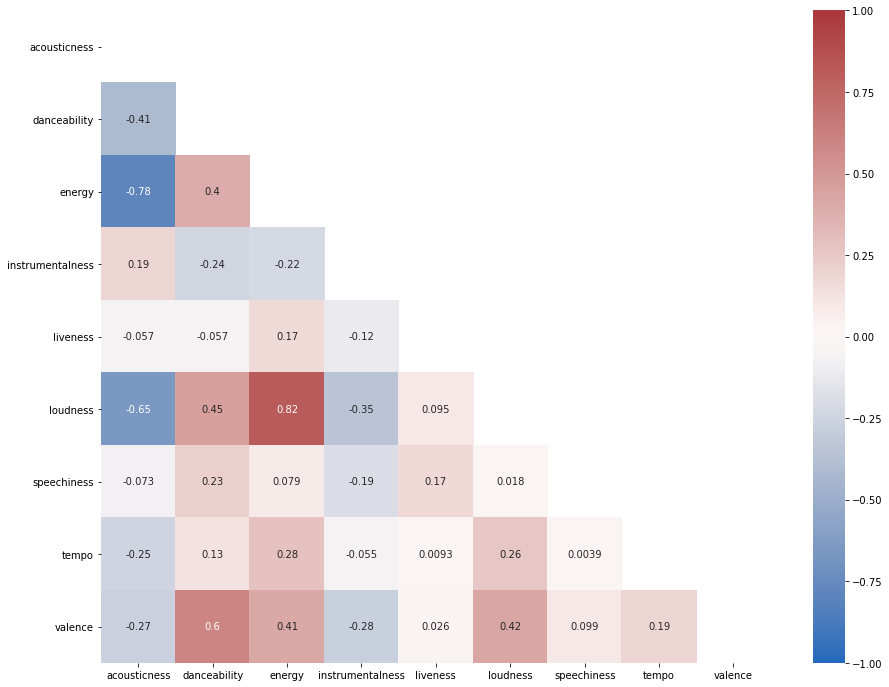

In [12]:
# visualising the correlation between song features
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(songs.iloc[:, 2:].corr(), dtype=np.bool))
sns.heatmap(songs.iloc[:, 2:].corr(), mask = mask, annot = True, cmap="vlag", vmax = 1, vmin=-1)

In [166]:
songs[(songs['song'] == 'House of the Rising Sun') & (songs['artist'] == 'The Animals')] 

,artist,song,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
1968734,The Animals,House of the Rising Sun,0.000335,0.316,0.484,0.004450,0.0912,0.767861,0.031622,0.469476,0.299
1968737,The Animals,House of the Rising Sun,0.397590,0.523,0.532,0.060300,0.1140,0.792969,0.031109,0.473073,0.212
1968739,The Animals,House of the Rising Sun,0.096586,0.220,0.677,0.000611,0.7120,0.757676,0.072177,0.519555,0.242
1968792,The Animals,House of the Rising Sun,0.000878,0.130,0.437,0.000001,0.0678,0.806111,0.036037,0.302480,0.147
1968799,The Animals,House of the Rising Sun,0.000335,0.316,0.484,0.004450,0.0912,0.767861,0.031622,0.469476,0.299
1968819,The Animals,House of the Rising Sun,0.007992,0.295,0.594,0.000130,0.9670,0.705983,0.092710,0.534652,0.266


#### Loading & Pre-Processing User Listening History

In [13]:
# importing user listening history from json files
histories = Path(r'G:\Thesis\Data\histories\giorgos').glob('*.json')
hist_dfs = (pd.read_json(f) for f in histories)
history = pd.concat(hist_dfs, ignore_index=True)
history.head(10)

,endTime,artistName,trackName,msPlayed
0,2020-11-16 22:11,The Album Leaf,Another Day (Revised),47831
1,2020-11-17 17:15,King Diamond,The Family Ghost - Live at Graspop,265724
2,2020-11-17 17:56,King Diamond,The 7th Day of July 1777 - Live at Graspop,56995
3,2020-11-17 20:13,Mac Miller,Blue World,203831
4,2020-11-17 20:26,Mac Miller,Good News,342040
5,2020-11-17 20:29,Mac Miller,I Can See,174328
6,2020-11-17 20:32,Mac Miller,Come Back to Earth,161840
7,2020-11-17 20:36,Mac Miller,Hurt Feelings,245640
8,2020-11-17 20:41,Mac Miller,What's the Use?,288640
9,2020-11-17 20:44,Mac Miller,Perfecto,215413


In [14]:
# finding out how many unique songs are there in the listening history
uq_hist = history['trackName'].unique()
len(uq_hist)

3517

In [15]:
# the dataset is from 2018
# this code calculates how many songs in the user's listening history
# do not exist in our dataset - aka how many songs released after 2018

# unique songs in our dataset
sng_val = songs['song'].values

# how many songs from the listening history exist in our dataset?
existence = {s: s in sng_val for s in uq_hist}
print(f"User history songs that exist in our dataset: {sum(existence.values())}")
print(f"Total amount of songs in the user's listening history: {len(existence)}")

User history songs that exist in our dataset: 2577
Total amount of songs in the user's listening history: 3517


In [16]:
# make a list of all the missing songs
missing = [k for k, v in existence.items() if not v]

In [17]:
# Using the spotify API to collect data for all songs in the missing list

import spotipy
import json
import time
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

new_songs = {}

# keeping track of which API calls failed - usually are calls for song info
# on podcasts and non-song data that might exist in the listening history
failed = []

for song in tqdm(missing):
    try:
        result = sp.search(song)
        tid = result['tracks']['items'][0]['id']
    except:
        # sometimes things like podcasts exist in the listening history of the user
        # trying to get song data for these will result in errors
        # we keep track of them and continue to the next song/item
        failed.append(song)
        continue
    features = sp.audio_features(tid)
    if features[0]: new_songs[result['tracks']['items'][0]['artists'][0]['name'], result['tracks']['items'][0]['name']] = features[0]
    else: failed.append(song)

100%|██████████| 940/940 [05:23<00:00,  2.90it/s]


In [18]:
# See which requests failed
print(failed[:5])
print(len(failed))

['And by Our Own Hand Did Every Last Bird Lie Silent in Their Puddles, the Air Barren of Song as the Clouds Drifted Away. For Killing Their Greatest Enemy, the Locusts Noisily Thanked Us and Turned Their Jaws Toward Our Crops, Swallowing Our Greed Whole', 'Millions Starved and We Became Skinner and Skinnier, While Our Leaders Became Fatter and Fatter', 'Τα αγαπημένα μας guilty pleasures  | UNCUT #14', 'S01 E21: «Σε 5 χρόνια από τώρα θα είμαστε όλοι τηγανητοί»', 'S01 E26: «Πού είναι το Grand Theft Auto 6 επιτέλους, δεν μας έχει μείνει αντίβαρο λογικής»']
5


In [19]:
# print any songs that might have empty entries
for k,v in new_songs.items(): 
  if new_songs[k] is None:
    print(k, v) 

In [20]:
# processing new song data similarly to how we processed the initial data
new_songs_df = pd.DataFrame.from_dict(new_songs, orient='index').reset_index()  
new_songs_df = new_songs_df.rename(columns = {'level_0':'artist', 'level_1':'song'})
new_songs_df = new_songs_df[['artist', 'song', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
fts = new_songs_df.iloc[:, 2:]
new_songs_df.iloc[:, 2:] = (fts-fts.min())/(fts.max()-fts.min())
new_songs_df.head(10)

,artist,song,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,The Album Leaf,Another Day (revised),0.545181,0.635675,0.635615,0.889001,0.031877,0.802631,0.030778,0.456161,0.040446
1,King Diamond,The Family Ghost - Live at Graspop,0.000050,0.181453,0.938767,0.011907,0.982405,0.785775,0.139125,0.361291,0.149369
2,King Diamond,The 7th Day of July 1777 - Live at Graspop,0.000037,0.189733,0.884561,0.149344,0.984475,0.768781,0.077229,0.635925,0.167004
3,Insomnium,"Winter's Gate, Pt. 1",0.002671,0.138869,0.958844,0.002513,0.702960,0.855141,0.490062,0.950457,0.035052
4,Insomnium,"Winter's Gate, Pt. 2",0.000225,0.231133,0.963863,0.248234,0.402815,0.891258,0.161840,0.951387,0.049990
5,Insomnium,"Winter's Gate, Pt. 3",0.005964,0.524485,0.845413,0.449041,0.269302,0.848875,0.020443,0.654195,0.329869
6,Insomnium,"Winter's Gate, Pt. 4",0.000168,0.083274,0.974905,0.225025,0.092320,0.897431,0.264055,0.307380,0.037646
7,Insomnium,"Winter's Gate, Pt. 5",0.282129,0.160161,0.692833,0.177598,0.537363,0.866263,0.024645,0.155927,0.125510
8,Russian Circles,Arluck,0.001918,0.281997,0.665730,0.817356,0.087146,0.865708,0.020897,0.227698,0.248955
9,Russian Circles,Kohokia,0.000110,0.266619,0.830355,0.722503,0.030325,0.867951,0.024872,0.563725,0.147294


In [21]:
# concatenating the two song datasets
songs = pd.concat([songs, new_songs_df]).reset_index(drop=True)
songs.head(5)

,artist,song,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Xzibit,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",0.180723,0.893,0.514,0.0,0.0596,0.828668,0.290554,0.383412,0.787
1,Erick Sermon,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",0.180723,0.893,0.514,0.0,0.0596,0.828668,0.290554,0.383412,0.787
2,J. Ro,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",0.180723,0.893,0.514,0.0,0.0596,0.828668,0.290554,0.383412,0.787
3,Tash,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",0.180723,0.893,0.514,0.0,0.0596,0.828668,0.290554,0.383412,0.787
4,Xzibit,Bitch Please II,0.078614,0.918,0.586,0.0,0.1450,0.861713,0.136550,0.382088,0.779


In [22]:
# getting song features for all of the listening history
history_full = songs.merge(history, left_on=['artist', 'song'], right_on=['artistName', 'trackName'], how='inner')
history_full = history_full.drop(columns=['artistName', 'trackName'])
history_full

,artist,song,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,endTime,msPlayed
0,The Animals,House of the Rising Sun,0.000335,0.316000,0.484000,0.004450,0.091200,0.767861,0.031622,0.469476,0.299000,2020-12-11 22:23,263125
1,The Animals,House of the Rising Sun,0.397590,0.523000,0.532000,0.060300,0.114000,0.792969,0.031109,0.473073,0.212000,2020-12-11 22:23,263125
2,The Animals,House of the Rising Sun,0.096586,0.220000,0.677000,0.000611,0.712000,0.757676,0.072177,0.519555,0.242000,2020-12-11 22:23,263125
3,The Animals,House of the Rising Sun,0.000878,0.130000,0.437000,0.000001,0.067800,0.806111,0.036037,0.302480,0.147000,2020-12-11 22:23,263125
4,The Animals,House of the Rising Sun,0.000335,0.316000,0.484000,0.004450,0.091200,0.767861,0.031622,0.469476,0.299000,2020-12-11 22:23,263125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15161,Sowulo,Noodlot Proloog - Acoustic,0.618474,0.418027,0.554306,0.073058,0.062616,0.766376,0.011584,0.390064,0.477173,2021-11-16 01:04,2080
15162,Maybeshewill,Critical Distance,0.009317,0.481902,0.927725,0.919273,0.190644,0.859118,0.015559,0.574862,0.294598,2021-11-16 17:16,290
15163,The American Dollar,4 Bc,0.017470,0.303288,0.698856,0.923310,0.070482,0.798169,0.011698,0.410662,0.123435,2021-11-16 17:26,2440
15164,Biffy Clyro,"Drop It - MTV Unplugged Live at Roundhouse, Lo...",0.000774,0.393187,0.542261,0.005277,0.327261,0.857500,0.011130,0.480342,0.233395,2021-11-16 20:59,66532


In [23]:
# average features per artist
artist_fts = songs.groupby('artist').mean()
artist_fts

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
artist,,,,,,,,,
!!!,0.063609,0.716390,0.797026,0.297236,0.187468,0.794895,0.074005,0.478129,0.649390
!DelaDap,0.085141,0.589000,0.822000,0.607000,0.212000,0.750977,0.051951,0.418938,0.776000
!Distain,0.176887,0.599957,0.764130,0.285253,0.127491,0.792782,0.038952,0.491385,0.390865
!K.Rob!,0.097761,0.682500,0.946000,0.000000,0.131950,0.838069,0.312115,0.442761,0.698000
!KRU,0.843373,0.610000,0.377000,0.015900,0.108000,0.717359,0.043634,0.319969,0.262000
...,...,...,...,...,...,...,...,...,...
Ｏns,0.578313,0.263000,0.563000,0.000001,0.096000,0.694892,0.049281,0.685856,0.638000
Ｏｃｅａｎ Ｓｈｏｒｅｓ,0.763509,0.433273,0.578545,0.899545,0.380173,0.655726,0.086056,0.587780,0.506273
ＳＩＯＮ,0.099371,0.442300,0.818800,0.000369,0.159220,0.834447,0.053008,0.523731,0.549300


#### History Stats

Generating some simple stats and visualisations based on the user's listening history

In [24]:
# Sometimes users skip songs. These songs shouldn't be considered in the listening history.
# Checking out to see how many songs plays lasted under 1 min, 45 sec, 30 sec, etc.

a = history['msPlayed'] < 60000
print(a.sum())

a = history['msPlayed'] < 45000
print(a.sum())

a = history['msPlayed'] < 30000
print(a.sum())

a = history['msPlayed'] < 25000
print(a.sum())

a = history['msPlayed'] < 20000
print(a.sum())

a = history['msPlayed'] < 15000
print(a.sum())

a = history['msPlayed'] < 10000
print(a.sum())

4297
4028
3697
3555
3386
3150
2824


In [25]:
# calculating total listening time in hours and ms
tot_ltime_ms = history['msPlayed'].sum()
tot_ltime_h = tot_ltime_ms/3600000

print(tot_ltime_ms)
print(tot_ltime_h)

3800822791
1055.7841086111112


In [26]:
# getting datetime info about each song in a format that's cleaner than plain timestamps
history['endTime'] = pd.to_datetime(history['endTime'])

history['Hour'] = history['endTime'].dt.hour
history['Day'] = history['endTime'].dt.dayofweek
history['Week'] = history['endTime'].dt.week
history['Month'] = history['endTime'].dt.month

history['hrPlayed'] = history['msPlayed']/3600000
history['minPlayed'] = history['msPlayed']/60000
# history['Season'] = history['Month']%12 // 3 + 1

<ipython-input-26-bc3718d7738b>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  history['Week'] = history['endTime'].dt.week


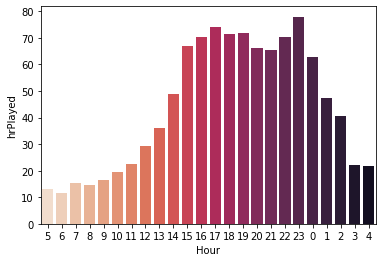

In [27]:
time_hour = history.groupby(['Hour']).sum()['hrPlayed']
ax = sns.barplot(x = time_hour.index, y = time_hour, palette="rocket_r", order=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4])

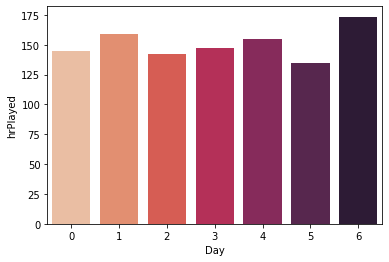

In [28]:
time_hour = history.groupby(['Day']).sum()['hrPlayed']
ax = sns.barplot(x = time_hour.index, y = time_hour, palette="rocket_r")

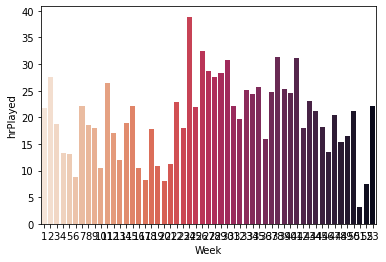

In [29]:
time_hour = history.groupby(['Week']).sum()['hrPlayed']
ax = sns.barplot(x = time_hour.index, y = time_hour, palette="rocket_r")

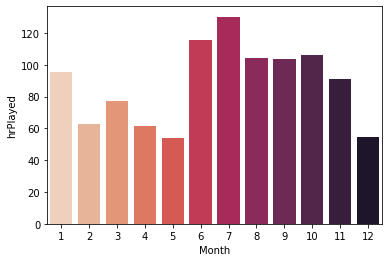

In [30]:
time_hour = history.groupby(['Month']).sum()['hrPlayed']
ax = sns.barplot(x = time_hour.index, y = time_hour, palette="rocket_r")

<AxesSubplot:xlabel='artistName'>

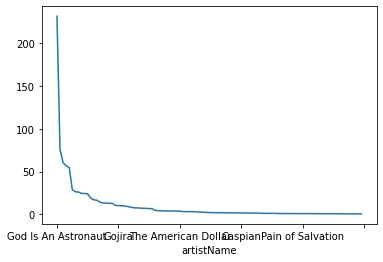

In [31]:
artist_time = history.groupby('artistName').sum()['msPlayed'].sort_values(ascending=False)
artist_time = artist_time/3600000
artist_time[:100].plot()

In [32]:
artist_time_min = history.groupby('artistName')['minPlayed'].sum().sort_values(ascending=False)
artist_time_min

artistName
God Is An Astronaut    13864.461567
Russian Circles         4545.000133
Trivium                 3618.341933
Batushka                3408.086367
Amon Amarth             3284.276033
                           ...     
Enter Shikari              0.000783
Serj Tankian               0.000000
Dealer                     0.000000
Arcane Roots               0.000000
Lower Than Atlantis        0.000000
Name: minPlayed, Length: 771, dtype: float64

In [33]:
track_time = history.groupby(['trackName', 'artistName']).sum()['msPlayed'].sort_values(ascending=False)
track_time = track_time/3600000
track_time[:10]

trackName                             artistName            
Malmok járnak                         Thy Catafalque            13.052202
Yekteniya I                           Batushka                  12.408008
Sing for the Damage We've Done        Harakiri for the Sky      12.250621
Burial                                God Is An Astronaut       10.880720
Champions of Disturbance (Pt. 1 & 2)  Crippled Black Phoenix     9.810337
Mjolner, Hammer of Thor               Amon Amarth                9.803876
Yekteniya II                          Batushka                   9.290199
Yekteniya III                         Batushka                   9.210369
Youngblood                            Russian Circles            9.082926
In The Court Of The Dragon            Trivium                    8.540821
Name: msPlayed, dtype: float64

In [34]:
month_time = history.groupby(['Month', 'artistName']).sum()['msPlayed'].sort_values(ascending=False)
month_time = month_time/3600000
month_time

Month  artistName           
6      God Is An Astronaut      41.951043
7      God Is An Astronaut      29.297710
11     God Is An Astronaut      23.588863
8      Trivium                  23.533857
12     God Is An Astronaut      22.896294
                                  ...    
7      This Will Destroy You     0.000000
       Dealer                    0.000000
       DevilDriver               0.000000
       Devin Townsend            0.000000
       System Of A Down          0.000000
Name: msPlayed, Length: 1693, dtype: float64

#### Exploring Artist Popularity

In [35]:
# calculating some basic stats about song popularity
# the "popularity" stat spotify provides is an obscure number between 0-100
# with no real explanation of how it's actually calculated by Spotify.
# hence, we have to do a bit of digging

songs_full = pd.read_csv(songs_file)
songs_full['popularity'].describe().apply(lambda x: format(x, 'f'))

count    11839780.000000
mean            5.853967
std            10.429309
min             0.000000
25%             0.000000
50%             1.000000
75%             7.000000
max           100.000000
Name: popularity, dtype: object

Text(0, 0.5, 'Number of songs (in millions)')

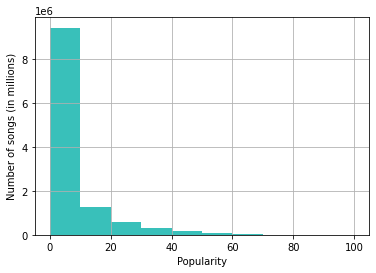

In [197]:
plot = songs_full['popularity'].hist(color="#39c0ba")
plot.set_xlabel("Popularity")
plot.set_ylabel("Number of songs (in millions)")

Text(0, 0.5, 'Number of songs (in millions)')

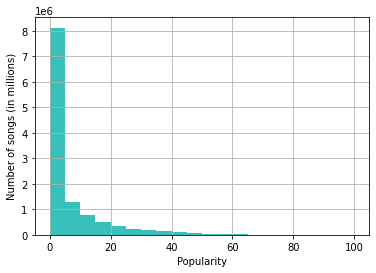

In [198]:
plot = songs_full['popularity'].hist(bins=20, color="#39c0ba")
plot.set_xlabel("Popularity")
plot.set_ylabel("Number of songs (in millions)")

Text(0, 0.5, 'Number of songs (in millions)')

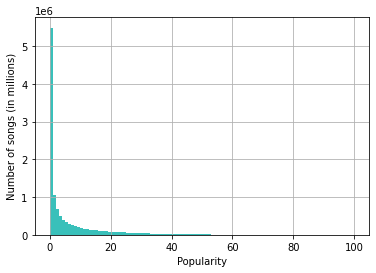

In [199]:
plot = songs_full['popularity'].hist(bins=100, color="#39c0ba")
plot.set_xlabel("Popularity")
plot.set_ylabel("Number of songs (in millions)")

In [39]:
# keeping track of artist popularity in a data structure
artist_pop = songs_full.groupby('artist').mean()['popularity'].sort_values(ascending=False)
artist_pop = artist_pop.to_dict()

#### Exploring Artist Following

In [40]:
# some basic stats on artist following
artists['followers'].describe().apply(lambda x: format(x, 'f'))

count     1066031.000000
mean         7012.359565
std        208718.428704
min             0.000000
25%             0.000000
50%             0.000000
75%           101.000000
max      78503098.000000
Name: followers, dtype: object

Text(0, 0.5, 'Folowers (in tens of millions)')

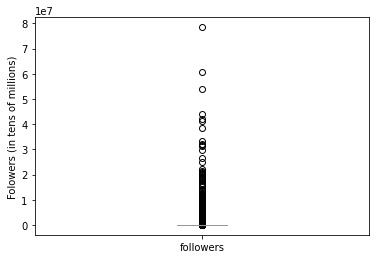

In [228]:
plot = artists['followers'].plot(kind="box", color="#39c0ba")
plot.set_ylabel("Folowers (in tens of millions)")

#### Making Recommendations

In [83]:
from scipy import stats
from sklearn.metrics.pairwise import cosine_similarity

from numpy import dot
from numpy.linalg import norm

from sklearn.metrics import calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MiniBatchKMeans
from tqdm import tqdm

def make_predictions(topx, num_suggestions=5, simil=1, popularity=6, followers=0, rmv_z=True, rmv_IQR=True, only_five=False, knn=False, weighted=True, verbose=True, debug=False):

    '''
    parameters:
        topx: number of the top artists in the user's listening history we use for recommendations
        num_suggestions: number of artists the algorithm suggests
        simil: percentage of similarity (between possible recommendation and user tastes) above which an artist will be ignored
            this serves as a way to recommend artists that are "further away" from the user's tastes - Works only with knn=False
        popularity: every artist with a popularity below this number can not be suggested
        followers: every artist with an amount of Spotify followers below this number can not be suggested
        rmv_z: if True, removes outliers based on z-score
        rmv_IQR: if True, removes outliers based on 1.5*IQR
        only_five: if True, uses only 5 artists for recommendations
        knn: True - uses knn. False - uses cosine similarity.
        weighted: if True, weights artist features based on how much time the user has listened to them
        verbose: if True, produces output
        debug: if True, produces debugging output
    '''
    
    # Get the names of the top artists
    top_artists = artist_time[:topx].index
    
    # Get audio features for the top artists
    top_fts = artist_fts[artist_fts.index.isin(top_artists)]
    
    if rmv_z:
        # Remove outliers based on z-score
        top_fts = top_fts[~(np.abs(stats.zscore(top_fts)) > 3).any(axis=1)]

    if rmv_IQR:
        # Remove outliers based on 1.5*IQR
        Q1, Q3 = np.percentile(top_fts, [25, 75], axis=0)
        IQR = Q3 - Q1
        upper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        top_fts = top_fts[~top_fts[(top_fts > upper) | (top_fts < lower)].any(axis=1)]   
    
    # Remove top artists from the overall artist features dataframe
    wo_top = artist_fts[~artist_fts.index.isin(top_artists)]
    
    # Get artist popularity for each of the artists
    if popularity:
        artist_pop = songs_full.groupby('artist').mean()['popularity'].sort_values(ascending=False)
        artist_pop = artist_pop[~artist_pop.index.isin(top_artists)]

        # Filter artists to be recommended by dropping the ones below a certain popularity
        wo_top = pd.concat([artist_pop, wo_top], axis=1)
        wo_top = wo_top.drop(wo_top[wo_top['popularity'] < popularity].index)

        # We don't need popularity for the rest of the calculations
        wo_top = wo_top.drop('popularity', axis=1)

    # Filter artists to be recommended by dropping the ones below a certain follower number
    if followers:
        wo_top = pd.merge(wo_top, artists[['name', 'followers']].set_index('name'), left_index=True, right_index=True)
        wo_top = wo_top.drop(wo_top[wo_top['followers'] < followers].index) 

        # We don't need followers for the rest of the calculations
        wo_top = wo_top.drop('followers', axis=1)

    # Get the time listened to as a percentage compared to other top artists
    # topw = artist_time[:topx]/(artist_time[:topx].sum())
    topw = artist_time[:topx]
    topw = topw.rename('wgt')

    # Calculating the correct number of clusters
    distortions = []

    for k in range(2, 4):
        kmeans = MiniBatchKMeans(n_clusters=k, max_iter=10000)
        pred = kmeans.fit_predict(top_fts)
        score = calinski_harabasz_score(top_fts, pred)

        distortions.append(score)

    max_value = max(distortions)
    nclust = distortions.index(max_value) + 2
    if verbose: print(f"Suggested number of clusters: {nclust}\n")

    # Clustering
    kmeans = MiniBatchKMeans(n_clusters=nclust, max_iter=10000)
    pred = kmeans.fit_predict(top_fts)
    top_fts['cluster'] = pred

    # Concat top artists and weights
    df = pd.concat([top_fts, topw], join="inner", axis=1)

    recommendations = {}

    for n in range(nclust):

        tempdf = df[df['cluster'] == n].sort_values("wgt", ascending=False)

        if only_five: tempdf = tempdf.head(5)

        # Create a weight vector
        if weighted:
            wgts = tempdf['wgt']/tempdf['wgt'].sum()
            wgt_vector = tempdf.loc[:, tempdf.columns != 'wgt'].multiply(wgts, axis=0).sum() 
        else:
            wgt_vector = tempdf.loc[:, tempdf.columns != 'wgt'].mean()
        
        wgt_vector = wgt_vector.drop('cluster')
        if debug: print(f"wgt_vector is {wgt_vector}\n")

        if verbose: 
            print(f"Cluster number {n}: {tempdf.index}")
            print(f"Recommended artists for this cluster:")

        if knn:
            neigh = NearestNeighbors(n_neighbors = num_suggestions, radius=1)
            neigh.fit(wo_top)
            result = neigh.kneighbors([wgt_vector])

            ll = []
            for idx in result[1][0]:
                artist = wo_top.iloc[idx].name
                if verbose: print(artist)
                ll.append(artist)

            recommendations[n] = ll
        else:
            # Pick artist recommendations based on cosine similarity
            result = dot(wo_top.values, wgt_vector)/(norm(wo_top.values, axis=1) * norm(wgt_vector))
            result = np.c_[wo_top.index.values, result]
            result = pd.DataFrame(result[result[:, 1].argsort()]).iloc[::-1]

            # Result[1] is the column where the similarity of an artist with the user's tastes is stored
            # Any artist that is above the simil threshold is not taken into account
            result = result[result[1] < simil]

            if verbose: print(result[:num_suggestions])

            recommendations[n] = list(result[:num_suggestions][0])
        if verbose: print("======================")

    return df, recommendations, nclust

In [84]:
df, recs, nclust = make_predictions(topx=50, num_suggestions=10, popularity=10, followers=10000, only_five=False, knn=False, weighted=True, debug=False)

Suggested number of clusters: 3

Cluster number 0: Index(['God Is An Astronaut', 'Russian Circles', 'Batushka', 'Red Sparowes',
       'If These Trees Could Talk', 'Crippled Black Phoenix', 'Toundra',
       'Collapse Under The Empire', 'Maybeshewill', 'Oh Hiroshima', 'Mogwai',
       'ISIS', 'Alcest', 'pg.lost', 'Tides From Nebula'],
      dtype='object')
Recommended artists for this cluster:
                            0         1
25962              Hi-Finesse  0.998483
25961         sleepmakeswaves  0.998279
25960              Epic North  0.997552
25959  Colossal Trailer Music  0.997495
25958            Genghis Tron  0.997013
25957                     甜梅號   0.99673
25956           Fleeting Joys  0.996574
25955    Blackwater Holylight    0.9965
25954                Brontide  0.996443
25953                    REZN  0.996388
Cluster number 1: Index(['Trivium', 'Lamb of God', 'Avenged Sevenfold', 'Biffy Clyro',
       'Cellar Darling', 'Powerwolf', 'King Diamond',
       'Bullet For My 

In [69]:
df.sort_values("cluster")

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster,wgt
Rise Against,0.037238,0.375347,0.928860,0.062963,0.196243,0.845983,0.111955,0.561762,0.432077,0,2.908033
Feared,0.029469,0.386617,0.866278,0.284528,0.230591,0.802479,0.074466,0.501231,0.269016,0,2.734231
Powerwolf,0.012904,0.327969,0.879856,0.020196,0.341676,0.850993,0.091677,0.497144,0.314293,0,3.288657
Cellar Darling,0.073344,0.378467,0.778133,0.028574,0.198413,0.806880,0.047919,0.579902,0.263587,0,4.787605
Lamb of God,0.010597,0.333696,0.966701,0.236854,0.325548,0.887415,0.136376,0.466158,0.232875,0,13.189526
Bullet For My Valentine,0.036094,0.347882,0.904076,0.038528,0.282352,0.851304,0.093054,0.495766,0.350309,0,3.209547
King Diamond,0.104726,0.366510,0.786052,0.265486,0.282086,0.761735,0.065988,0.502893,0.336790,0,3.281224
Avenged Sevenfold,0.007420,0.406597,0.905546,0.032495,0.272341,0.832657,0.077928,0.532120,0.359250,0,9.952569
Trivium,0.026301,0.366369,0.897162,0.123522,0.211946,0.850648,0.097792,0.471209,0.337352,0,60.305699
Biffy Clyro,0.093797,0.434086,0.709237,0.044684,0.316585,0.806445,0.051039,0.529685,0.336714,0,7.796959


#### Evaluation/Experiments

In [44]:
import spotipy
import json
import time
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

In [158]:
def evaluate(nclust, dataframe):
    recart = {}
    rprec = []

    for n in range(nclust):
        recart[n] = df[df['cluster'] == n].sort_values("wgt", ascending=False).head(5).index

    for n in range(nclust):

        recarttest = []

        for artist in recart[n]:
            try:
                recarttest.append(artist_id[artist])
            except:
                print(f"ERROR: {artist}")

        spotify_recs = sp.recommendations(seed_artists=recarttest, limit=100)
        
        spotify_recs_set = set()
        for rec in spotify_recs['tracks']:
            spotify_recs_set.add(rec['album']['artists'][0]['name'])

        recslen = len(spotify_recs_set)
        intersection = spotify_recs_set.intersection(recs[n])
        interlen = len(intersection)
        rprec.append(interlen/recslen)

    return(np.mean(rprec))

In [46]:
evaluate(nclust, df)

0.07889344262295082

In [47]:
pop_grid = [0, 1, 5, 6, 7, 10, 15, 20]
fol_grid = [0, 100, 7000, 10000, 50000]
# rmv_z = [True, False]
# rmv_IQR = [True, False]
# only_five = [True, False]
# knn = [True, False]
wgt_grid = [True, False]

In [48]:
pop_grid = [0, 1, 5, 10]
fol_grid = [25000, 50000, 75000]
# rmv_z = [True, False]
# rmv_IQR = [True, False]
# only_five = [True, False]
# knn = [True, False]
wgt_grid = [True, False]

grid = pd.DataFrame(columns = ['Popularity', 'Followers', 'Weighted', 'Mean R Precision'])

for i in tqdm(range(3)):
    for p in pop_grid:
        for f in fol_grid:
            for w in wgt_grid:
                df, recs, nclust = make_predictions(30, 100, popularity=p, followers=f, only_five=False, knn=False, weighted=w, verbose=False)
                mean_rprec = evaluate(nclust, df)
                grid = grid.append({'Popularity': p, 'Followers': f, 'Weighted': w, 'Mean R Precision': mean_rprec},ignore_index = True)

grid.sort_values('Mean R Precision', ascending=False).head(15)

100%|██████████| 3/3 [20:36<00:00, 412.12s/it]


,Popularity,Followers,Weighted,Mean R Precision
4,0,75000,True,0.132879
17,5,75000,False,0.125075
62,5,50000,True,0.123377
43,10,25000,False,0.119690
8,1,50000,True,0.119207
38,5,50000,True,0.118182
28,0,75000,True,0.114820
65,5,75000,False,0.114605
59,1,75000,False,0.113416
36,5,25000,True,0.112405


In [49]:
grid.groupby(['Popularity', 'Followers', 'Weighted']).mean().sort_values('Mean R Precision', ascending=False).reset_index().head(10)

,Popularity,Followers,Weighted,Mean R Precision
0,0,75000,True,0.115130
1,5,75000,False,0.106467
2,5,50000,True,0.103343
3,5,25000,True,0.101033
4,10,50000,True,0.100120
5,10,25000,False,0.098635
6,1,50000,False,0.097012
7,5,75000,True,0.095488
8,1,75000,False,0.095237
9,1,75000,True,0.095101


In [52]:
grid.groupby(['Popularity']).mean().sort_values('Mean R Precision', ascending=False).reset_index().head(10)

,Popularity,Mean R Precision
0,5,0.095200
1,1,0.090660
2,0,0.090309
3,10,0.084103


In [50]:
grid.groupby(['Followers']).mean().sort_values('Mean R Precision', ascending=False).reset_index().head(10)

,Followers,Mean R Precision
0,75000,0.094432
1,50000,0.091044
2,25000,0.084729


In [51]:
grid.groupby(['Weighted']).mean().sort_values('Mean R Precision', ascending=False).reset_index().head(10)

,Weighted,Mean R Precision
0,True,0.092342
1,False,0.087794


#### Less Similar Recommendations

In [151]:
similarities = []

for percentage in tqdm(np.arange(1, 0.88, -0.01)):
    df, recs, nclust = make_predictions(30, 100, popularity=1, followers=75000, simil=percentage, only_five=False, knn=False, weighted=w, verbose=False)
    similarities.append((percentage, evaluate(nclust, df)))

100%|██████████| 12/12 [05:05<00:00, 25.42s/it]


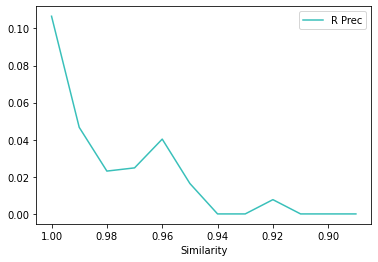

In [229]:
sim = pd.DataFrame(similarities, columns=['Similarity', 'R Prec']).set_index('Similarity')
sim.plot(color="#39c0ba").invert_xaxis()